In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('common_beers.csv')

In [3]:
df.head()

brewery_id             brewery_name          review_time  review_overall  review_aroma  review_appearance review_profilename    beer_style  review_palate  review_taste     beer_name  beer_abv  beer_beerid  year    abv_group
0         163   Amstel Brouwerij B. V.  2002-01-13 23:09:52             3.0           2.0                3.0            fodeeoz   Light Lager            2.5           2.5  Amstel Light       3.5          436  2002        light
1         163   Amstel Brouwerij B. V.  2002-01-12 18:44:46             2.5           3.0                3.0             jdhilt   Light Lager            2.0           2.0  Amstel Light       3.5          436  2002        light
2         163   Amstel Brouwerij B. V.  2001-10-03 11:51:20             3.0           2.0                2.0          xXTequila   Light Lager            2.0           3.0  Amstel Light       3.5          436  2001        light
3         163   Amstel Brouwerij B. V.  2001-04-25 12:47:49             3.0           3.0                3.0              Brent   Light Lager            2.0           2.0  Amstel Light       3.5          436  2001        light
4        1075  Caldera Brewing Company  2010-05-04 03:52:09             4.0           4.0                4.0              Akfan  American IPA            4.0           4.5   Caldera IPA       6.1        10784  2010  medium_high

## Collaborative Filtering 

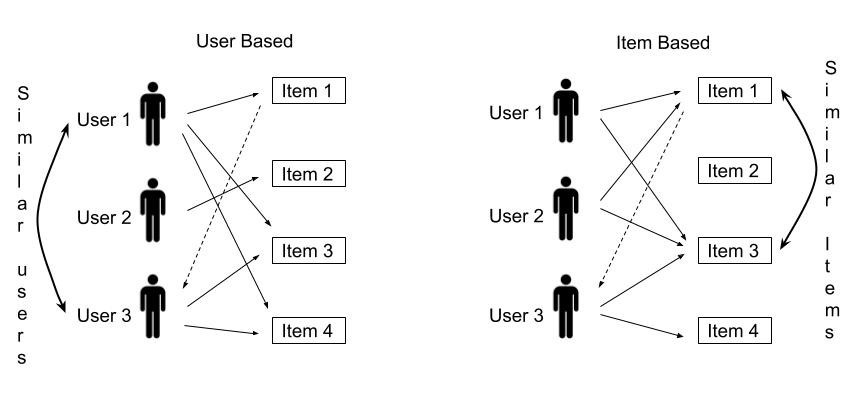

Collaborative filtering uses similarities between users and items simultaneously to provide recommendations. This allows for serendipitous recommendations; that is, collaborative filtering models can recommend an item to user A based on the interests of a similar user B. 

### 1- Item Based Filtering

Here, we explore the relationship between the pair of items (the user who bought Y, also bought Z). Item-item collaborative filtering, or item-based, or item-to-item, is a form of collaborative filtering for recommender systems based on the similarity between items calculated using people's ratings of those items. 

Item-item collaborative filtering was invented and used by Amazon.com in 1998. It was first published in an academic conference in 2001.*

*https://en.wikipedia.org/wiki/Item-item_collaborative_filtering

In [4]:
df.head()

brewery_id             brewery_name          review_time  review_overall  review_aroma  review_appearance review_profilename    beer_style  review_palate  review_taste     beer_name  beer_abv  beer_beerid  year    abv_group
0         163   Amstel Brouwerij B. V.  2002-01-13 23:09:52             3.0           2.0                3.0            fodeeoz   Light Lager            2.5           2.5  Amstel Light       3.5          436  2002        light
1         163   Amstel Brouwerij B. V.  2002-01-12 18:44:46             2.5           3.0                3.0             jdhilt   Light Lager            2.0           2.0  Amstel Light       3.5          436  2002        light
2         163   Amstel Brouwerij B. V.  2001-10-03 11:51:20             3.0           2.0                2.0          xXTequila   Light Lager            2.0           3.0  Amstel Light       3.5          436  2001        light
3         163   Amstel Brouwerij B. V.  2001-04-25 12:47:49             3.0           3.0                3.0              Brent   Light Lager            2.0           2.0  Amstel Light       3.5          436  2001        light
4        1075  Caldera Brewing Company  2010-05-04 03:52:09             4.0           4.0                4.0              Akfan  American IPA            4.0           4.5   Caldera IPA       6.1        10784  2010  medium_high

In [5]:
df['beer_name'].nunique()

1167

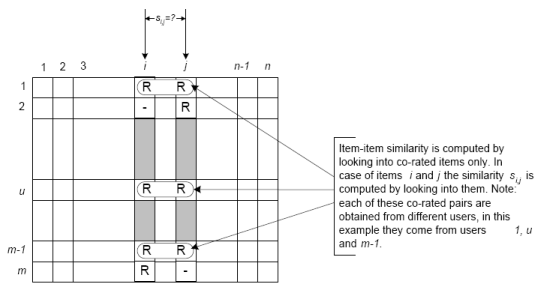

**First of all, we need to create the user data frame with users in the rows, items in the columns, and the points given to these items as values.**

In [6]:
user_beer_df = df.pivot_table(index=['review_profilename'], columns=['beer_name'], values='review_overall')

In [7]:
user_beer_df.head()

beer_name           #9  120 Minute IPA  1554 Enlightened Black Ale  21st Amendment IPA  2XIPA  2° Below Winter Ale  30th Anniversary - Fritz And Ken's Ale  30th Anniversary - Grand Cru  30th Anniversary - Jack & Ken's Ale  30th Anniversary- Charlie, Fred And Ken's Bock  312 Urban Wheat  400 Pound Monkey  471 IPA  60 Minute IPA  8 Ball Stout  90 Minute IPA  A Little Sumpin' Extra! Ale  A Little Sumpin' Sumpin' Ale  A Little Sumpin' Wild  ACME California IPA  \
review_profilename                                                                                                                                                                                                                                                                                                                                                                                                                                                             
0110x011           NaN             NaN                         NaN                 4.5    NaN                  NaN                                     NaN                           NaN                                  NaN                                             NaN              NaN               NaN      NaN            NaN           NaN            5.0                          NaN                           NaN                    NaN                  NaN   
01Ryan10           NaN             NaN                         NaN                 NaN    NaN                  NaN                                     NaN                           NaN                                  NaN                                             NaN              NaN               NaN      NaN            NaN           NaN            NaN                          NaN                           NaN                    NaN                  NaN   
02maxima           NaN             NaN                         NaN                 NaN    NaN                  NaN                                     NaN                           NaN                                  NaN                                             NaN              NaN               NaN      NaN            NaN           NaN            NaN                          NaN                           NaN                    NaN                  NaN   
03SVTCobra         NaN             NaN                         NaN                 NaN    NaN                  NaN                                     NaN                           NaN                                  NaN                                             NaN              NaN               NaN      NaN            NaN           NaN            NaN                          NaN                           NaN                    NaN                  NaN   
05Harley           NaN             4.0                         NaN                 NaN    NaN                  NaN                                     NaN                           NaN                                  NaN                                             NaN              NaN               NaN      NaN            NaN           NaN            4.0                          NaN                           4.5                    NaN                  NaN   

beer_name           Abbaye Des Rocs Grand Cru Belgian Special Brown  Abbey Belgian Style Ale  Abbot Ale  Abrasive Ale  Adam  Aecht Schlenkerla Rauchbier Märzen  Aecht Schlenkerla Rauchbier Urbock  Aecht Schlenkerla Rauchbier Weizen  Affligem Blond  Affligem Noël  Affligem Tripel  Alaskan Amber  Alaskan Smoked Porter  Alaskan Winter Ale  Alba Scots Pine Ale  Ale To The Chief  AleSmith Grand Cru Ale  AleSmith Horny Devil  AleSmith IPA  AleSmith Old Numbskull  AleSmith Speedway Stout  \
review_profilename                                                                                                                                                                                                                                                    

In [8]:
user_beer_df.shape

(27451, 1167)

#### Making Beer Recommendations

In [11]:
def check_beer(keyword):
    key_ = [key for key in df.beer_name if keyword in key] 
    list_set = set(key_)
    unique_list = (list(list_set))
    return unique_list

In [12]:
check_beer('London')

["Fuller's London Porter",
 "Young's Special London Ale",
 "Fuller's London Pride"]

**Note**  

*We are looking for beers with the keyword London in them. Since this is a completely personal preference, you can search for the item you want.

In [13]:
beer_name = "Fuller's London Porter"
beer_name = user_beer_df[beer_name]

#### Computing similarity between items

In [14]:
recommendations = user_beer_df.corrwith(beer_name).sort_values(ascending=False).index.tolist()[1:10]

**We find 10 items that have a high correlation with the item.**

**- Recommendations For London Porter**

In [15]:
recommendations

['Mischief',
 'Black Butte XXI',
 'Bourbon Barrel Quad (BBQ)',
 'Samuel Adams Harvest Pumpkin Ale',
 'Thomas Hooker Liberator Doppelbock',
 'Brown Ale',
 'Terrapin Moo-Hoo Chocolate Milk Stout',
 'Brewhouse Coffee Stout',
 "Bell's Amber Ale"]

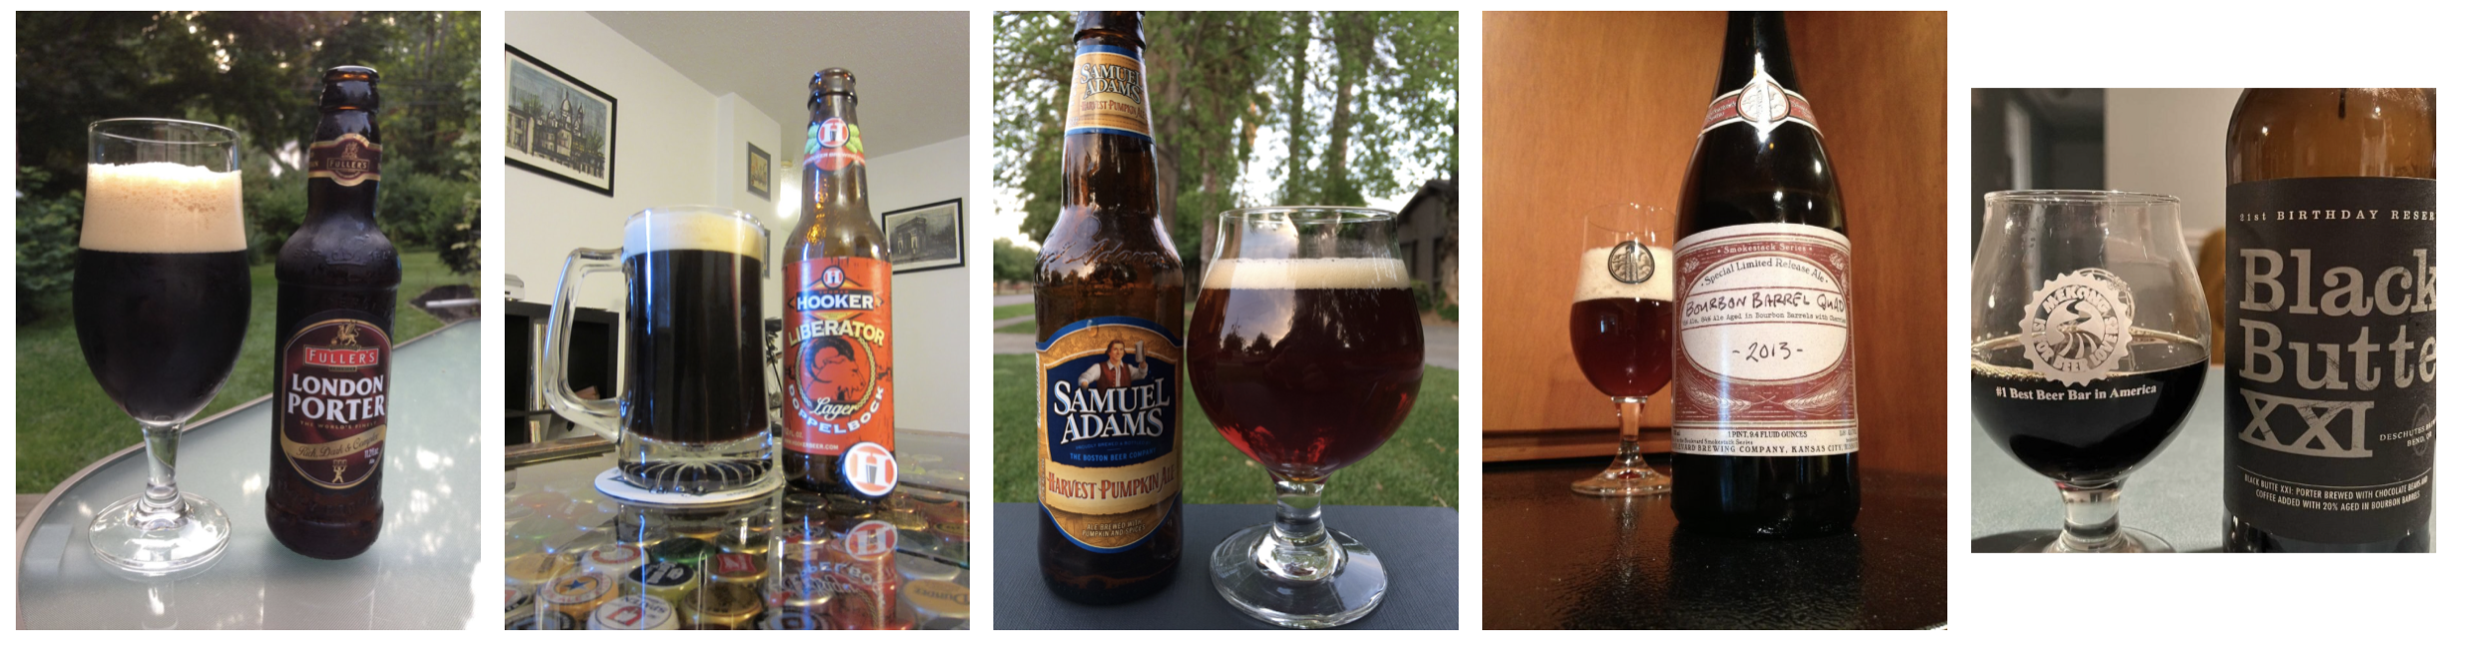

**We see that porter and stout beers are in the majority of the recommendations.**

**The History of Porters and Stouts**

The beer known as Porter first appeared in the early 1700’s, becoming a common beverage of choice with thirsty London workers. The extreme popularity of the style prompted brewers to release different Porters of varying characteristics. One of the first of these was a strong brew which was christened Single Stout Porter. This appears to be the first time the word ‘Stout’ was used to describe a beer.

So to put it simply, originally a Stout was a strong Porter. Double, Triple and Imperial Stout Porters soon followed. Over the following century the ‘Porter’ suffix was gradually dropped from these beers, and Porters and Stouts became standalone beers in their own right

In [16]:
check_beer('Guinness')

['Guinness 250th Anniversary Stout',
 'Guinness Draught',
 'Guinness Extra Stout (Original)',
 'Guinness Foreign Extra Stout']

In [17]:
beer_name = 'Guinness Draught'
beer_name = user_beer_df[beer_name]
recommendations = user_beer_df.corrwith(beer_name).sort_values(ascending=False).index.tolist()[1:10]

**- Recommendations For Guinness Draught**

In [18]:
recommendations

['Old Rasputin XII',
 "Murphy's Irish Stout",
 '§ucaba (Abacus)',
 'Beamish Irish Stout',
 'Juniper Black Ale (JBA) - Beer Camp #16',
 'Stone Belgo Anise Imperial Russian Stout',
 'Single-Wide I.P.A.',
 'Boddingtons Pub Ale',
 'Jason Fields & Kevin Sheppard / Tröegs / Stone Cherry Chocolate Stout']

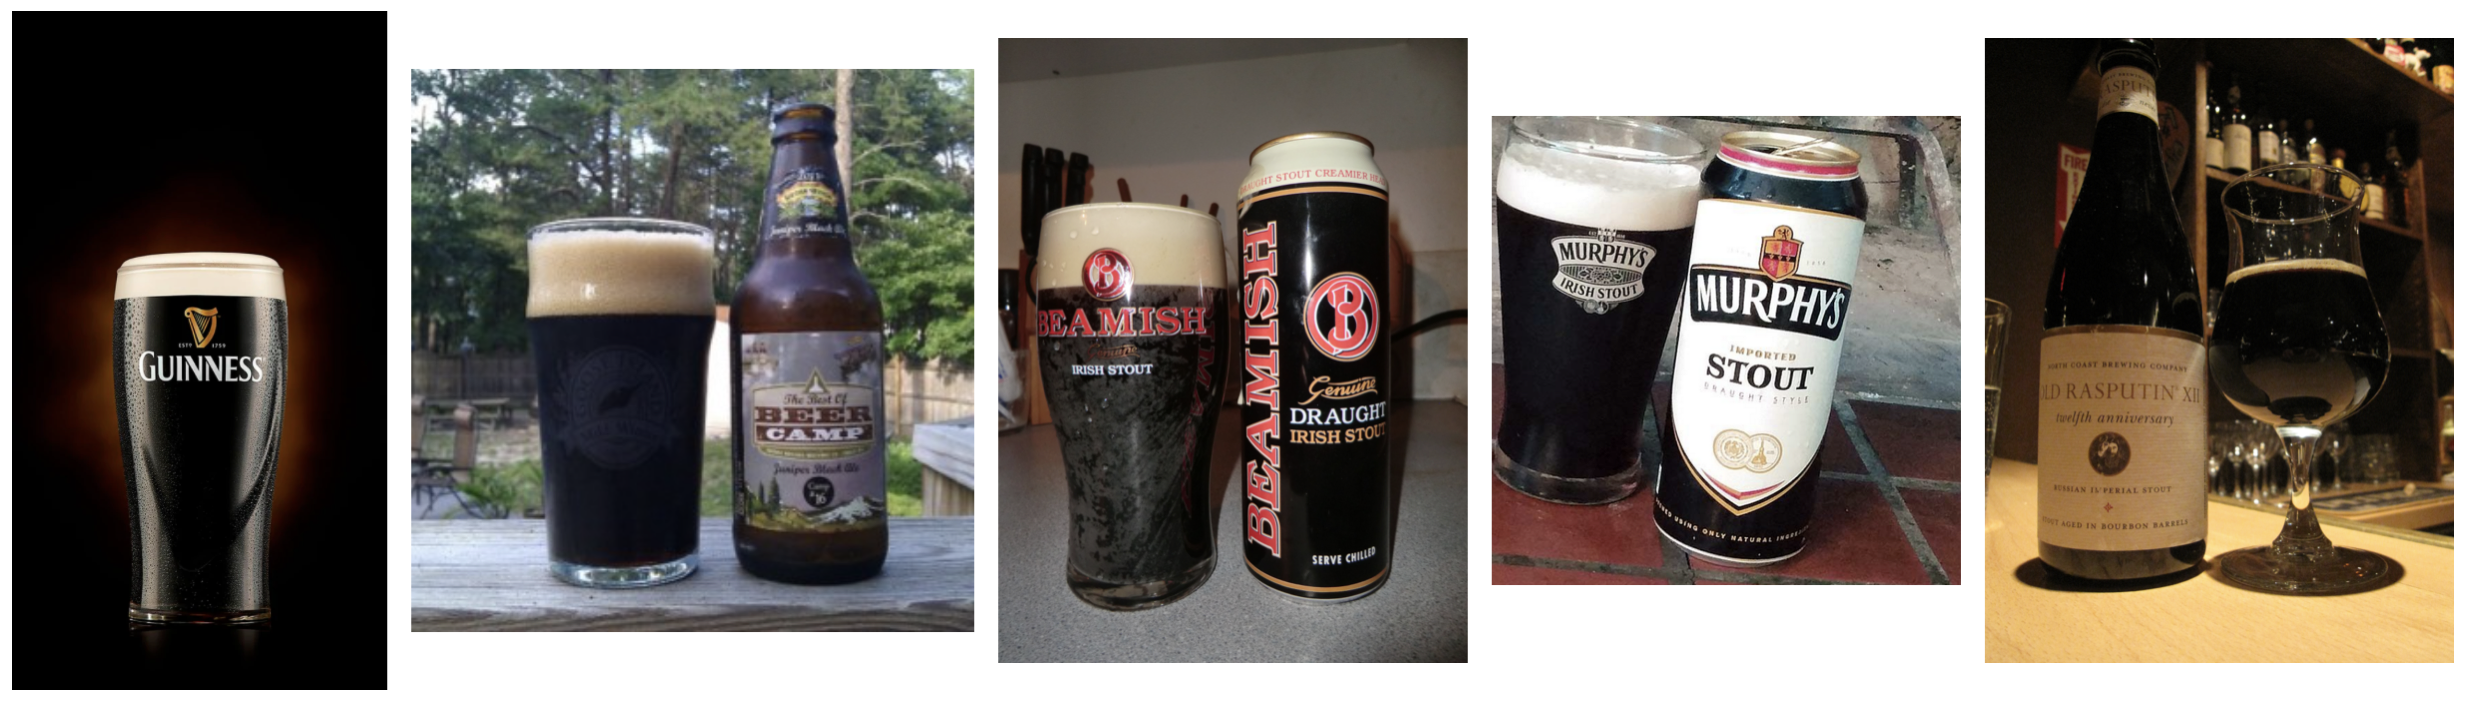

### 2- User Based Filtering  

User Based Collaborative Filtering is one kind of recommendation method which looks for similar users based on the items users have already liked or positively interacted with.

#### Data Preparation   


Similarities are calculated by exploring user a's and user k's votes for items.

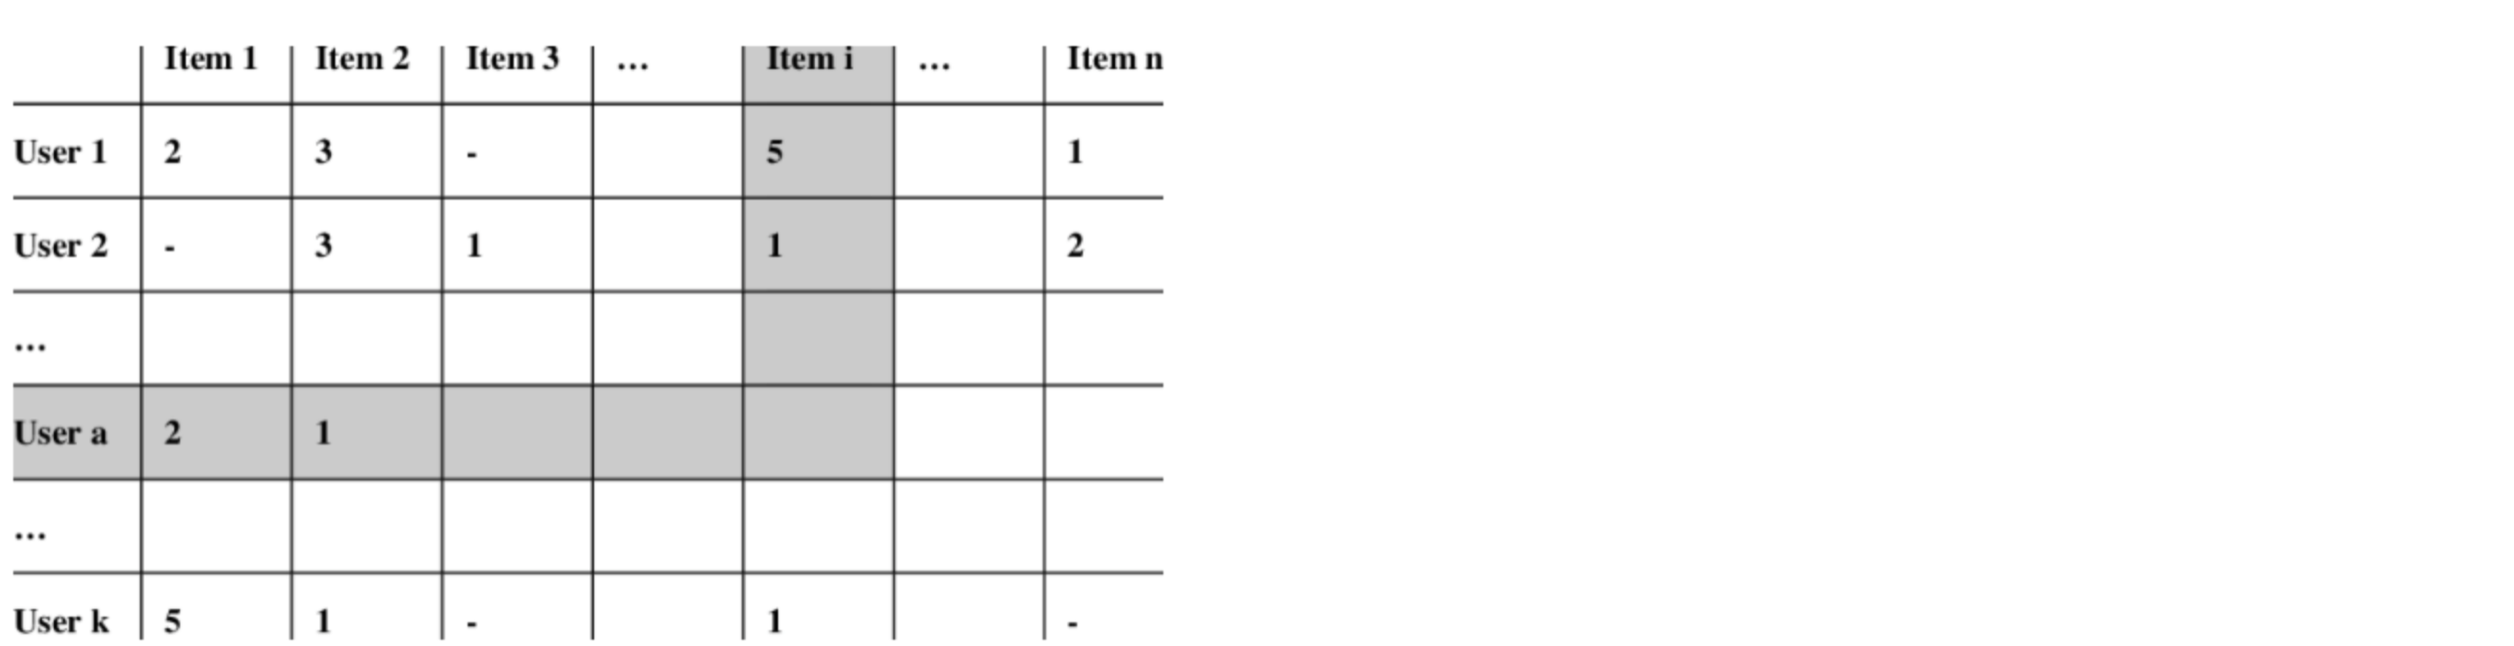

In [20]:
profile_counts = pd.DataFrame(df['review_profilename'].value_counts())
rare_users = profile_counts[profile_counts['review_profilename'] <= 50].index
common_ = df[~df['review_profilename'].isin(rare_users)]

**In the dataset, there are users who voted for a very low number of beers.I'm dropping users who voted less than 50**

In [21]:
user_beer_df = common_.pivot_table(index=['review_profilename'], columns=['beer_name'], values='review_overall')

In [22]:
random_user = (pd.Series(user_beer_df.index).sample(1, random_state=9).values)

In [23]:
random_user[0]

'magictrokini'

**We randomly determine the user to whom we will give beer advice.**

In [24]:
random_user_df = user_beer_df[user_beer_df.index == random_user[0]]

In [25]:
random_user_df

beer_name           #9  120 Minute IPA  1554 Enlightened Black Ale  21st Amendment IPA  2XIPA  2° Below Winter Ale  30th Anniversary - Fritz And Ken's Ale  30th Anniversary - Grand Cru  30th Anniversary - Jack & Ken's Ale  30th Anniversary- Charlie, Fred And Ken's Bock  312 Urban Wheat  400 Pound Monkey  471 IPA  60 Minute IPA  8 Ball Stout  90 Minute IPA  A Little Sumpin' Extra! Ale  A Little Sumpin' Sumpin' Ale  A Little Sumpin' Wild  ACME California IPA  \
review_profilename                                                                                                                                                                                                                                                                                                                                                                                                                                                             
magictrokini       NaN             4.0                         3.5                 4.0    NaN                  3.5                                     NaN                           NaN                                  NaN                                             NaN              NaN               NaN      3.5            4.0           4.0            4.0                          NaN                           4.5                    NaN                  3.0   

beer_name           Abbaye Des Rocs Grand Cru Belgian Special Brown  Abbey Belgian Style Ale  Abbot Ale  Abrasive Ale  Adam  Aecht Schlenkerla Rauchbier Märzen  Aecht Schlenkerla Rauchbier Urbock  Aecht Schlenkerla Rauchbier Weizen  Affligem Blond  Affligem Noël  Affligem Tripel  Alaskan Amber  Alaskan Smoked Porter  Alaskan Winter Ale  Alba Scots Pine Ale  Ale To The Chief  AleSmith Grand Cru Ale  AleSmith Horny Devil  AleSmith IPA  AleSmith Old Numbskull  AleSmith Speedway Stout  \
review_profilename                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
magictrokini                                                    NaN                      NaN        NaN           NaN   4.5                                 4.0                                 4.5                                 NaN             NaN            3.0              NaN            3.5                    4.5                 3.0                  2.0               4.5                     4.0                   4.0           4.0                     4.5                      4.5   

beer_name           AleSmith Wee Heavy  Allagash Black  Allagash Curieux (Bourbon Barrel-Aged Tripel)  Allagash Dubbel Ale  Allagash FOUR  Allagash Grand Cru  Allagash Interlude  Allagash Odyssey  Allagash Tripel Ale  Allagash White  Alpha King Pale Ale  Alpha Klaus Christmas (Xmas) Porter  Amber  Amber Ale  American Amber Ale  American Pale Ale  Amstel Light  Anchor Bock Beer  Anchor Liberty Ale  Anchor Old Foghorn  Anchor Porter  Anchor Small Beer  Anchor Steam Beer  Anchor Summer Beer  \
review_profilename                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
magictrokini                       4.5             3.0                                            3.5                  NaN            3.5          

In [26]:
reviewed_beers = random_user_df.columns[random_user_df.notna().any()].tolist()

In [27]:
len(reviewed_beers)

496

In [28]:
reviewed_beers[:10]

['120 Minute IPA',
 '1554 Enlightened Black Ale',
 '21st Amendment IPA',
 '2° Below Winter Ale',
 '471 IPA',
 '60 Minute IPA',
 '8 Ball Stout',
 '90 Minute IPA',
 "A Little Sumpin' Sumpin' Ale",
 'ACME California IPA']

In [29]:
user_beer_df.loc[user_beer_df.index == random_user[0],
                 user_beer_df.columns == '60 Minute IPA']

beer_name           60 Minute IPA
review_profilename               
magictrokini                  4.0

In [30]:
reviewed_beers_df = user_beer_df[reviewed_beers]

In [31]:
user_beer_count = reviewed_beers_df.T.notnull().sum()

**Other users reviewing the same beers**

In [32]:
user_beer_count[:10]

review_profilename
0110x011      56
05Harley      46
100floods     55
1759Girl      82
1Adam12       26
1fastz28     154
2xHops        34
321jeff       17
32hoss32      37
3Vandoo       57
dtype: int64

In [33]:
user_beer_count = user_beer_count.reset_index()

In [34]:
user_beer_count.columns = ['user_id_2', 'beer_count']

**Users who reviewed on more than half of the beers reviewed by the user to be recommended**

In [36]:
user_beer_count[user_beer_count['beer_count'] > 250].sort_values('beer_count', ascending=False)[1:11]

user_id_2  beer_count
260    BuckeyeNation         474
611      Halcyondays         452
2542          jwc215         444
94       BEERchitect         433
1487         Wasatch         431
3545          zeff80         427
2753     mikesgroove         424
1529           Zorro         424
1380  TheManiacalOne         421
2878  northyorksammy         419

In [37]:
users_same_beers = user_beer_count[user_beer_count['beer_count'] > 250]['user_id_2']

In [38]:
final_df = pd.concat([reviewed_beers_df[reviewed_beers_df.index.isin(users_same_beers)],
                      random_user_df[reviewed_beers]])

In [39]:
final_df.head()

beer_name           120 Minute IPA  1554 Enlightened Black Ale  21st Amendment IPA  2° Below Winter Ale  471 IPA  60 Minute IPA  8 Ball Stout  90 Minute IPA  A Little Sumpin' Sumpin' Ale  ACME California IPA  Adam  Aecht Schlenkerla Rauchbier Märzen  Aecht Schlenkerla Rauchbier Urbock  Affligem Noël  Alaskan Amber  Alaskan Smoked Porter  Alaskan Winter Ale  Alba Scots Pine Ale  Ale To The Chief  AleSmith Grand Cru Ale  AleSmith Horny Devil  AleSmith IPA  AleSmith Old Numbskull  \
review_profilename                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
ADR                            NaN                         4.5                 NaN                  NaN      NaN            4.0           NaN            4.0                           NaN                  4.0   4.0                                 NaN                                 3.5            4.0            NaN                    4.0                 4.0                  4.5               NaN                     NaN                   NaN           NaN                     NaN   
AlexJ                          4.5                         NaN                 NaN                  NaN      5.0            5.0           4.5            5.0                           NaN                  NaN   NaN                                 4.0                                 NaN            5.0            NaN                    4.5                 NaN                  4.0               NaN                     5.0                   4.5           5.0                     5.0   
BEERchitect                    4.5                         4.5                 4.0                  NaN      4.0            5.0           NaN            5.0                           4.5                  4.0   4.5                                 3.5                                 3.5            4.5            4.0                    4.5                 NaN                  4.5               4.0                     4.5                   NaN           5.0                     4.0   
BeerFMAndy                     1.5                         3.0                 NaN                  3.0      NaN            4.5           3.5            3.0                           NaN                  NaN   3.5                                 4.0                                 3.5            3.5            3.0                    NaN                 NaN                  NaN               NaN                     3.0                   NaN           4.0                     NaN   
BeerManDan                     NaN                         4.0                 NaN                  4.0      NaN            2.0           4.0            NaN                           4.0                  NaN   4.0                                 4.0                                 4.5            4.0            4.0                    3.5                 4.0                  NaN               NaN                     4.5                   4.0           NaN                     4.0   

beer_name           AleSmith Speedway Stout  AleSmith Wee Heavy  Allagash Black  Allagash Curieux (Bourbon Barrel-Aged Tripel)  Allagash FOUR  Allagash Grand Cru  Allagash Odyssey  Allagash Tripel Ale  American Amber Ale  Anchor Bock Beer  Anchor Liberty Ale  Anchor Old Foghorn  Anchor Porter  Anchor Small Beer  Anchor Steam Beer  ApriHop  Arrogant Bastard Ale  Audacious Apricot Ale  Autumn Maple  Avery Anniversary Ale - Fifteen  Ayinger Bräu Weisse  Ayinger Celebrator Doppelbock  \
review_profilename                                                                                                  

- The rows represent the users who have reviewed more than half of the beers reviewed by the user to be recommended, while the columns represent the beers reviewed by the user to be recommended.

In [40]:
corr_df = final_df.T.corr().unstack().sort_values().drop_duplicates()

In [41]:
corr_df = pd.DataFrame(corr_df, columns=['corr'])

In [42]:
corr_df.index.names = ['user_id_1', 'user_id_2']

In [43]:
corr_df = corr_df.reset_index()

In [44]:
corr_df.head()

user_id_1        user_id_2      corr
0   srandycarter           jdhilt -0.252120
1         jdhilt        Floydster -0.154908
2       Crosling         champ103 -0.144760
3         jdhilt           oberon -0.135668
4  LilBeerDoctor  brewdlyhooked13 -0.121230

In [45]:
top_users = corr_df[(corr_df['user_id_1'] == random_user[0]) & (corr_df['corr'] >= 0.6)][['user_id_2', 'corr']].reset_index(drop=True)

- We find users who have at least 60% correlation with the user to be recommended.

In [46]:
top_users = top_users.sort_values(by='corr', ascending=False)

In [47]:
top_users.rename(columns={'user_id_2': 'review_profilename'}, inplace=True)

In [48]:
top_users[1:]

review_profilename      corr
5             rye726  0.690860
4             Foxman  0.659529
3             zeff80  0.624492
2            Pegasus  0.619578
1          bditty187  0.611603
0          Cyberkedi  0.610036

In [49]:
top_users_ratings = top_users.merge(common_[['review_overall', 'beer_name', 'review_profilename']], how='inner')

In [50]:
top_users_ratings = top_users_ratings[top_users_ratings['review_profilename'] != random_user[0]]

In [51]:
top_users_ratings.head()

review_profilename     corr  review_overall                                      beer_name
496             rye726  0.69086             1.5                                   Amstel Light
497             rye726  0.69086             4.5                                Founders Cerise
498             rye726  0.69086             5.0  Barrel Aged B.O.R.I.S. Oatmeal Imperial Stout
499             rye726  0.69086             3.5                                Founders Rübæus
500             rye726  0.69086             5.0  B.O.R.I.S. The Crusher Oatmeal-Imperial Stout

- We merge the ratings given by users whose correlation exceeds the threshold we have set, the correlation, and the beers they rated.  
- Since we want to see the effect of correlation and given ratings together, we multiply the correlation and given ratings.

In [52]:
top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['review_overall']

In [53]:
top_users_ratings.groupby('beer_name').agg({'weighted_rating': "mean"})[:10]

weighted_rating
beer_name                                                      
#9                                                     2.091563
120 Minute IPA                                         2.441337
1554 Enlightened Black Ale                             2.526388
21st Amendment IPA                                     2.469056
2XIPA                                                  2.472670
2° Below Winter Ale                                    2.263965
30th Anniversary - Fritz And Ken's Ale                 2.621565
30th Anniversary - Grand Cru                           2.630705
30th Anniversary - Jack & Ken's Ale                    2.497968
30th Anniversary- Charlie, Fred And Ken's Bock         2.497968

In [54]:
recommendation_df = top_users_ratings.groupby('beer_name').agg({'weighted_rating':'mean'}).reset_index()

In [55]:
recommendation_df[recommendation_df['weighted_rating'] > 3][:10]

beer_name  weighted_rating
22                                   Abrasive Ale         3.107308
35                         AleSmith Grand Cru Ale         3.108871
37                                   AleSmith IPA         3.005738
40                             AleSmith Wee Heavy         3.121200
46                             Allagash Interlude         3.211091
47                               Allagash Odyssey         3.046209
64                                  Aphrodisiaque         3.099732
66                                      Apple Ale         3.108871
79                            Avec Les Bons Voeux         3.050145
97  Barrel Aged B.O.R.I.S. Oatmeal Imperial Stout         3.099732

In [56]:
beers_to_be_recommend = recommendation_df[recommendation_df['weighted_rating'] > 3].sort_values('weighted_rating', ascending=False)

In [57]:
beers_to_be_recommend[:5]

beer_name  weighted_rating
270                 Cuvee De Tomme         3.454302
149                   Black Albert         3.454302
775                 Pure Hoppiness         3.454302
556  Kuhnhenn Fourth Dementia (4D)         3.454302
781                        Racer X         3.454302

In [58]:
recommendations = beers_to_be_recommend[:5].beer_name.values.tolist()
print(recommendations)

['Cuvee De Tomme', 'Black Albert', 'Pure Hoppiness', 'Kuhnhenn Fourth Dementia (4D)', 'Racer X']


## Conclusion 

- As a result, we can recommend the 5 items with the highest weighted rating to the user, since the weighted ratings of these items are made up of ratings and correlation effect from users who are highly correlated with the user to recommend. In other words, we recommend items that are liked by users who have a similar liking structure as the user.  

- To summarize for the whole study, it is seen that many variables such as taste, aroma, alcohol rate affect the ratings given to beers.  

- Item based collaborative filtering finds similarity patterns between items and recommends them to users based on the computed information, whilst user based finds similar users and gives them recommendations based on what other people with similar consumption patterns appreciate